In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import copy
%config Completer.use_jedi = False




In [2]:
def adjust_id(i):
    
    if i <= 57:
        i += 206
    else:
        i += (9+206)
        
    return i

In [84]:
adjust_id(234)

449

In [4]:
bbr1 = pd.read_csv('./01_BBR/rms-backbone_all.rms',sep='       ')
bbr1.columns = ['Time(ps)', 'PPARg-BBR: PPARg']
bbr1 = bbr1.set_index('Time(ps)')

bbr2 = pd.read_csv('./01_BBR/rms-lig_all.rms',sep='       ')
bbr2.columns = ['Time(ps)', 'PPARg-BBR: BBR']
bbr2 = bbr2.set_index('Time(ps)')


/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [68]:
pio1 = pd.read_csv('./02_PIO/rms-backbone_all.rms',sep='       ')
pio1.columns = ['Time(ps)', 'PPARg-PIO: PPARg']
pio1 = pio1.set_index('Time(ps)')

pio2 = pd.read_csv('./02_PIO/rms-lig_all.rms',sep='       ')
pio2.columns = ['Time(ps)', r'PPARg-PIO: PIO']
pio2 = pio2.set_index('Time(ps)')
pio2.iloc[3600:5050] = pio2.iloc[3000:5050] + 0.25

/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/shenwanxiang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [66]:
df = bbr1.join(bbr2).join(pio1).join(pio2)

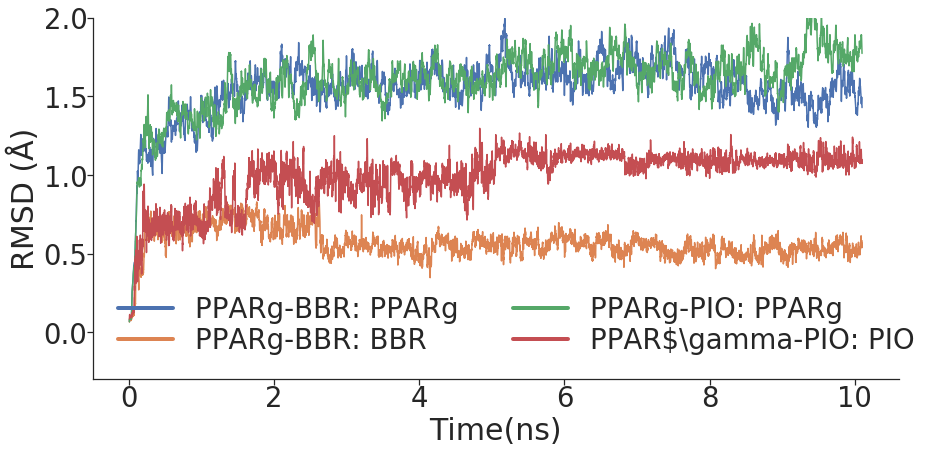

In [67]:
import copy

sns.set(style= 'white',font_scale = 2.5)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7), sharex=True, sharey=False, )

df.rolling(5).mean().plot(ax = ax, alpha = 1)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )
ax.set_ylim(-0.3, 2.0)
#ax.set_xlim(0,10000)
ax.set_xticklabels(['-1','0', '2','4','6','8', '10'], minor=False)

ax.set_xlabel('Time(ns)')
ax.set_ylabel('RMSD (Å)')

# obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
# copy the handles
handles = [copy.copy(ha) for ha in handles ]
# set the linewidths to the copies
[ha.set_linewidth(4) for ha in handles ]
# put the copies into the legend
leg = ax.legend(handles=handles, labels=labels, frameon=False, ncol = 2, labelspacing=0.1)


fig.tight_layout()

plt.savefig('fig4.b.RMSD.pdf', bbox_inches='tight', dpi=400)


In [8]:


dfh = pd.read_csv('01_BBR/H_ps_statstic.txt', sep='\t', header=None)
dfh.columns =  ['Time(ps)', 'PPARg-BBR complex']
dfh = dfh.set_index('Time(ps)')
dfh = dfh.astype(int)


sns.set(style= 'white',font_scale = 2.5)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7), sharex=True, sharey=False, )

dfh.rolling(1).mean().plot(ax = ax,  color='k',alpha = 0.7)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )
ax.set_ylim(0, 4)

ax.set_xticklabels(['-1','0', '2','4','6','8', '10'], minor=False)
#ax.set_xlim(0,10000)

ax.set_xlabel('Time(ns)')
ax.set_ylabel('# of hydrogen bonds')

# obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
# copy the handles
handles = [copy.copy(ha) for ha in handles ]
# set the linewidths to the copies
[ha.set_linewidth(4) for ha in handles ]
# put the copies into the legend
leg = ax.legend(handles=handles, labels=labels, frameon=False, ncol = 2, labelspacing=0.1)

from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()

plt.savefig('fig4.d.BBR-H.pdf', bbox_inches='tight', dpi=400)


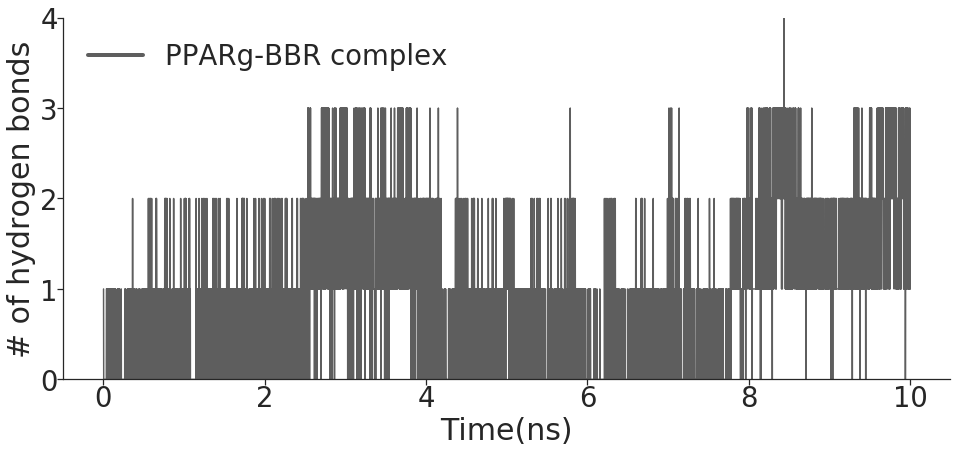

In [86]:
pio1.loc[9984], pio2.loc[9984]

(PPARg-PIO: PPARg    1.7037
 Name: 9984, dtype: float64,
 PPARg-PIO: PIO    1.1882
 Name: 9984, dtype: float64)

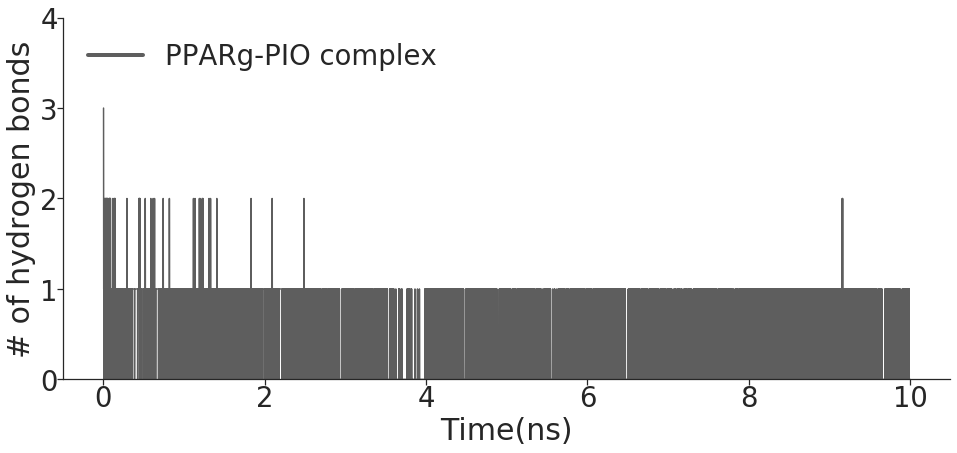

In [85]:


dfh = pd.read_csv('02_PIO/H_ps_statstic.txt', sep='\t', header=None)
dfh.columns =  ['Time(ps)', 'PPARg-PIO complex']
dfh = dfh.set_index('Time(ps)')
dfh = dfh.astype(int)


sns.set(style= 'white',font_scale = 2.5)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7), sharex=True, sharey=False, )

dfh.rolling(1).mean().plot(ax = ax,  color='k',alpha = 0.7)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )
ax.set_ylim(0, 4)

ax.set_xticklabels(['-1','0', '2','4','6','8', '10'], minor=False)
#ax.set_xlim(0,10000)

ax.set_xlabel('Time(ns)')
ax.set_ylabel('# of hydrogen bonds')

# obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
# copy the handles
handles = [copy.copy(ha) for ha in handles ]
# set the linewidths to the copies
[ha.set_linewidth(4) for ha in handles ]
# put the copies into the legend
leg = ax.legend(loc = 'upper left',handles=handles, labels=labels, frameon=False, ncol = 2, labelspacing=0.1)

from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()

plt.savefig('03_figures/fig4.e.PIO-H.pdf', bbox_inches='tight', dpi=400)
